In [ ]:
pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=176845eb4caa0244d3a0d49ef0a3f9f166d826c530771ab8360e447b07d7554a
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=11cf6f8225cb77f3927af186dd8f1f3053b992af6f9fbdb4fb161e7de0de9456
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.utils import np_utils
import itertools

In [ ]:
#load dataset
data = np.load('/content/FR -CCNN/ORL_faces.npz')

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [ ]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [ ]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 53, 43, 36)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [ ]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=20, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/20
1/1 - 11s - loss: 0.6857 - accuracy: 0.7895 - val_loss: 0.5448 - val_accuracy: 0.8333 - 11s/epoch - 11s/step
Epoch 2/20
1/1 - 9s - loss: 0.5587 - accuracy: 0.8246 - val_loss: 0.4847 - val_accuracy: 0.8333 - 9s/epoch - 9s/step
Epoch 3/20
1/1 - 8s - loss: 0.4614 - accuracy: 0.8816 - val_loss: 0.3672 - val_accuracy: 0.9167 - 8s/epoch - 8s/step
Epoch 4/20
1/1 - 9s - loss: 0.4657 - accuracy: 0.8553 - val_loss: 0.2125 - val_accuracy: 1.0000 - 9s/epoch - 9s/step
Epoch 5/20
1/1 - 9s - loss: 0.3366 - accuracy: 0.8553 - val_loss: 0.1759 - val_accuracy: 0.9167 - 9s/epoch - 9s/step
Epoch 6/20
1/1 - 8s - loss: 0.2788 - accuracy: 0.9167 - val_loss: 0.1584 - val_accuracy: 1.0000 - 8s/epoch - 8s/step
Epoch 7/20
1/1 - 9s - loss: 0.2066 - accuracy: 0.9386 - val_loss: 0.1030 - val_accuracy: 1.0000 - 9s/epoch - 9s/step
Epoch 8/20
1/1 - 9s - loss: 0.1869 - accuracy: 0.9518 - val_loss: 0.0843 - val_accuracy: 1.0000 - 9s/epoch - 9s/step
Epoch 9/20
1/1 - 8s - loss: 0.1176 - accuracy: 0.9737 - val_l

In [ ]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.5476
test acc 0.8813


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


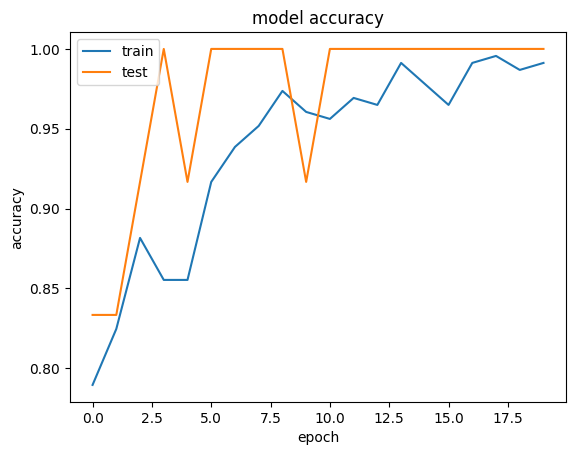

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

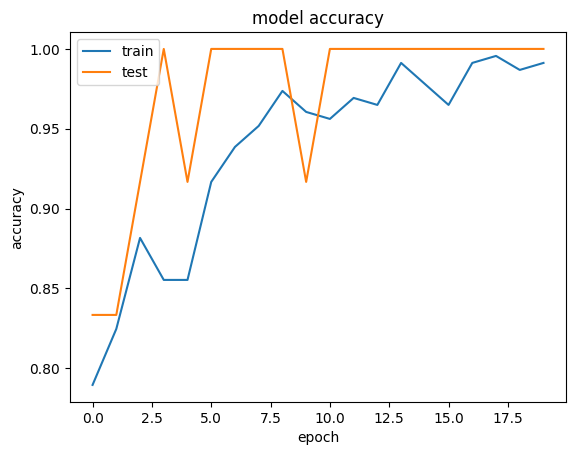

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
predicted = np.array(cnn_model.predict(x_test))

# Extract predicted classes using argmax
ynew = np.argmax(predicted, axis=1)

Acc = accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)

5/5 [==============================] - 4s 872ms/step
accuracy : 
0.88125


In [ ]:
cnf_matrix = confusion_matrix(np.array(y_test), ynew)
y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
         #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)



Confusion matrix, without normalization
[[3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


Confusion matrix, without normalization


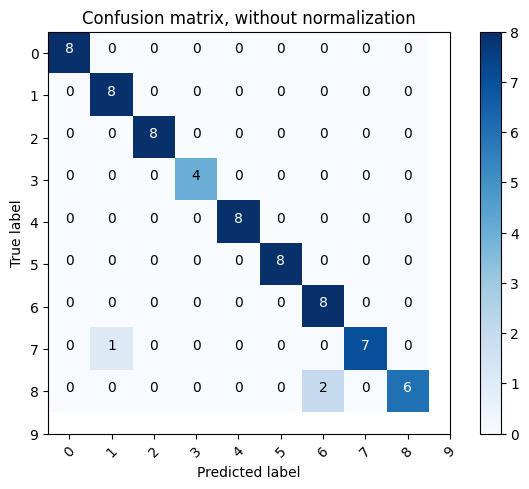

Confusion matrix, without normalization


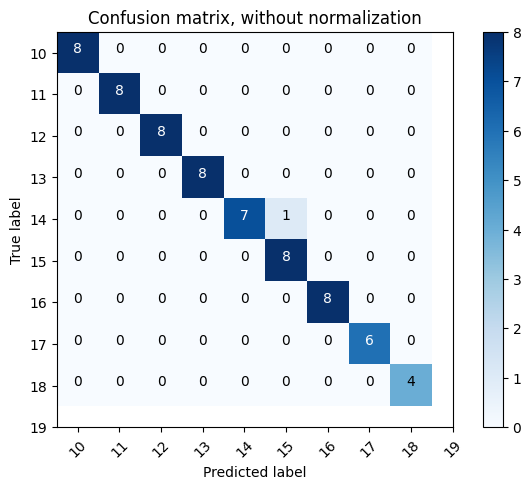

Confusion matrix:
[[3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 4 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))

In [ ]:
print(classification_report(np.array(y_test), ynew))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       1.00      1.00      1.00         8
           2       0.62      1.00      0.76         8
           3       1.00      1.00      1.00         8
           4       1.00      0.50      0.67         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.80      1.00      0.89         8
           8       1.00      0.88      0.93         8
           9       1.00      0.75      0.86         8
          10       0.80      1.00      0.89         8
          11       0.80      1.00      0.89         8
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       0.64      0.88      0.74         8
          16       0.89      1.00      0.94         8
          17       0.80    